# Práctica 7. Housing Dataset

## Descripción del dataset

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per \$10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [38]:
import numpy as np
import seaborn as sb
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



In [39]:
BOSTON_DATASET = "./housing/housing.data.txt"
columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [40]:
df = pd.read_csv(BOSTON_DATASET, delim_whitespace=True, names=columns)

In [41]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


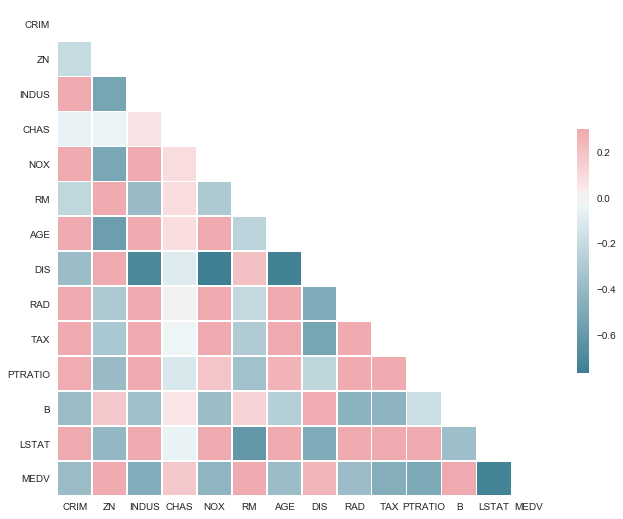

In [44]:
sb.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#This is only necesary to remove matplot lib error 
#does not do anything really.
plt.show()


In [ ]:
#Ejercicio 2

In [ ]:
import tflearn


In [ ]:
Y = df[['MEDV']]
X = df.drop('MEDV', axis=1)


In [ ]:
def train_step(X, Y):

    #Modelo
    tnorm = tflearn.initializations.uniform(minval=-1., maxval=1.)
    input_ = tflearn.input_data(shape=[None, 13])
    hidden = tflearn.fully_connected(input_, n_units=1, activation='linear', weights_init=tnorm)
    output = tflearn.fully_connected(hidden, n_units=1, activation=None, name='output',  weights_init=tnorm)

    regression = tflearn.regression(output, optimizer='sgd', loss='mean_square',
                                    metric='accuracy', learning_rate=.7)

    #Entrenamiento
    m = tflearn.DNN(regression)
    m.fit(X, Y, n_epoch=150, show_metric=True, snapshot_epoch=False)
    return m

In [ ]:
def mu(valores):
    return sum(valores)/len(valores)
#Suma de los errores al cuadrado
def sse(reales, obtenidos):
    result = 0
    for i in range(len(reales)):
        result += pow(reales[i] - obtenidos[i], 2)
    return result

def mse(reales, obtenidos):
    return sse(reales, obtenidos)/len(reales)

In [ ]:
def minmax(x,min,max, reverse=False):
    if reverse:
        return(x*(max-min)+min)
    return (x-min)/(max-min)

def mapminmax(array, min_max=None, reverse=False):
    if(min_max and reverse):
        (min,max) = min_max
        vminmax = np.vectorize(minmax)
        return vminmax(array,min,max,True)
    min = np.min(array)
    max = np.max(array)
    vminmax = np.vectorize(minmax)
    return (vminmax(array,min,max),min,max)

def vminmax(vector, min_max=None, reverse=False):
    norm = []
    (min,max) = min_max
    for n in vector:
        norm.append(minmax(n,min,max,reverse))
    return np.array(norm)


In [ ]:
(X, imin, imax) = mapminmax(X)
(Y,tmin, tmax) = mapminmax(Y)

In [ ]:

#model = train_step(np.array(X), np.array(Y))
